In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
from skimage.filters import threshold_otsu

In [30]:
image = cv2.imread('edgesb.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 5)

<Figure size 640x480 with 0 Axes>

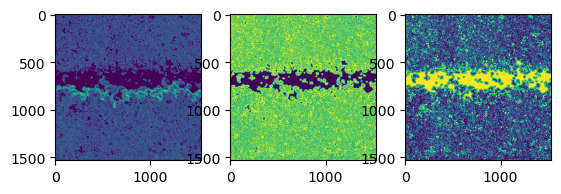

In [27]:
entropy_trs = entropy(thresh, disk(2)) 
trs_value = threshold_otsu(entropy_trs) 
binary_trs = entropy_trs <= trs_value

plt.figure()
x, y = plt.subplots(1, 3)
y[0].imshow(image)
y[1].imshow(thresh)
y[2].imshow(binary_trs)

In [28]:
binary_trs = binary_trs.astype(int)
binary_trs = (binary_trs*255).astype(np.uint8)
cv2.imwrite('entropy_sbc.png', binary_trs)

True

In [20]:
contours, hierarchy = cv2.findContours(binary_trs, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cont = {}

for n in range(len(contours)):
    length = len(contours[n])
    cont.update({n:length})
max_edge = max(cont.values())

def get_key(val):
    for key, value in cont.items():
        if val == value:
            return key

n_max = get_key(max_edge)

max_cont = []
max_cont.append(contours[n_max])
max_contour = tuple(max_cont)
cv2.drawContours(image=image, contours=max_contour, contourIdx=-1, color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.imwrite('entropy_edge.png', image)

True